In [3]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [4]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [5]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [6]:
filtered_crusttop = final_df[final_df['Step'].str.strip() == 'Add crust top']
filtered_crusttop

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C002,28,Add crust top,360.315844,491.358404,774.073914,600.747154,961.973069,1211.884444,931.091523,717.321184
16,C004,30,Add crust top,139.675576,288.360246,394.479865,301.143706,538.717189,330.320840,224.956147,220.192450
27,C005,46,Add crust top,56.901104,110.299522,93.322110,91.630500,325.461920,69.909413,144.506222,0.000000
38,C010,54,Add crust top,242.861087,273.040864,432.151793,353.209896,569.980302,715.391916,496.599415,345.312053
51,C014,32,Add crust top,129.400866,165.235262,552.197715,219.320445,368.823296,436.997454,347.407777,230.671859
62,C015,33,Add crust top,263.613792,359.860502,309.033983,311.921119,283.010013,617.506904,503.229457,406.718852
73,C018,50,Add crust top,77.729065,148.757117,113.207691,96.022745,101.715698,517.764006,370.341684,239.953540
84,C019,40,Add crust top,143.077504,197.756925,281.300912,226.541034,387.526666,881.089580,627.494689,368.058107
95,C022,32,Add crust top,369.265942,453.681424,535.320317,482.845447,490.933110,982.043881,747.805006,607.182973
106,C023,52,Add crust top,179.159644,225.684684,226.651162,222.848127,194.875458,518.581086,426.112731,321.399603


In [7]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_crusttop = filtered_crusttop.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_crusttop.select_dtypes(include=['float64', 'int64']).columns
filtered_crusttop[numerical_cols] = filtered_crusttop[numerical_cols].replace(0, np.nan)

filtered_crusttop[numerical_cols] = imputer.fit_transform(filtered_crusttop[numerical_cols])
filtered_crusttop

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C002,28.0,Add crust top,360.315844,491.358404,774.073914,600.747154,961.973069,1211.884444,931.091523,717.321184
16,C004,30.0,Add crust top,139.675576,288.360246,394.479865,301.143706,538.717189,330.320840,224.956147,220.192450
27,C005,46.0,Add crust top,56.901104,110.299522,93.322110,91.630500,325.461920,69.909413,144.506222,195.593751
38,C010,54.0,Add crust top,242.861087,273.040864,432.151793,353.209896,569.980302,715.391916,496.599415,345.312053
51,C014,32.0,Add crust top,129.400866,165.235262,552.197715,219.320445,368.823296,436.997454,347.407777,230.671859
62,C015,33.0,Add crust top,263.613792,359.860502,309.033983,311.921119,283.010013,617.506904,503.229457,406.718852
73,C018,50.0,Add crust top,77.729065,148.757117,113.207691,96.022745,101.715698,517.764006,370.341684,239.953540
84,C019,40.0,Add crust top,143.077504,197.756925,281.300912,226.541034,387.526666,881.089580,627.494689,368.058107
95,C022,32.0,Add crust top,369.265942,453.681424,535.320317,482.845447,490.933110,982.043881,747.805006,607.182973
106,C023,52.0,Add crust top,179.159644,225.684684,226.651162,222.848127,194.875458,518.581086,426.112731,321.399603


In [8]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Crusttop',
    'HeadCamera Distance': 'HeadCamera Distance - Add Crusttop',
    'LeftElbow Distance': 'LeftElbow Distance - Add Crusttop',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Crusttop',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Crusttop',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Crusttop',
    'RightElbow Distance': 'RightElbow Distance - Add Crusttop',
    'RightShoulder Distance': 'RightShoulder Distance - Add Crusttop'
}

# Rename columns
filtered_crusttop = filtered_crusttop.rename(columns=new_column_names)
filtered_crusttop

,Participant,Block Design Raw Score,Step,Chest Distance - Add Crusttop,HeadCamera Distance - Add Crusttop,LeftElbow Distance - Add Crusttop,LeftShoulder Distance - Add Crusttop,MotionControllerLeft Distance - Add Crusttop,MotionControllerRight Distance - Add Crusttop,RightElbow Distance - Add Crusttop,RightShoulder Distance - Add Crusttop
5,C002,28.0,Add crust top,360.315844,491.358404,774.073914,600.747154,961.973069,1211.884444,931.091523,717.321184
16,C004,30.0,Add crust top,139.675576,288.360246,394.479865,301.143706,538.717189,330.320840,224.956147,220.192450
27,C005,46.0,Add crust top,56.901104,110.299522,93.322110,91.630500,325.461920,69.909413,144.506222,195.593751
38,C010,54.0,Add crust top,242.861087,273.040864,432.151793,353.209896,569.980302,715.391916,496.599415,345.312053
51,C014,32.0,Add crust top,129.400866,165.235262,552.197715,219.320445,368.823296,436.997454,347.407777,230.671859
62,C015,33.0,Add crust top,263.613792,359.860502,309.033983,311.921119,283.010013,617.506904,503.229457,406.718852
73,C018,50.0,Add crust top,77.729065,148.757117,113.207691,96.022745,101.715698,517.764006,370.341684,239.953540
84,C019,40.0,Add crust top,143.077504,197.756925,281.300912,226.541034,387.526666,881.089580,627.494689,368.058107
95,C022,32.0,Add crust top,369.265942,453.681424,535.320317,482.845447,490.933110,982.043881,747.805006,607.182973
106,C023,52.0,Add crust top,179.159644,225.684684,226.651162,222.848127,194.875458,518.581086,426.112731,321.399603


In [9]:
#filtered_crusttop.to_csv('SimplePie_AddCrusttop.csv',index=False)

In [10]:
tracker_columns = ['Chest Distance - Add Crusttop', 'HeadCamera Distance - Add Crusttop', 'LeftElbow Distance - Add Crusttop', 'LeftShoulder Distance - Add Crusttop',
                   'RightElbow Distance - Add Crusttop', 'RightShoulder Distance - Add Crusttop', 'MotionControllerLeft Distance - Add Crusttop',
                   'MotionControllerRight Distance - Add Crusttop']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_crusttop, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_crusttop[block_design_col], filtered_crusttop[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_crusttop, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Crusttop,-0.198675,0.495931
1,HeadCamera Distance - Add Crusttop,-0.552865,0.040315
2,LeftElbow Distance - Add Crusttop,-0.625552,0.016727
3,LeftShoulder Distance - Add Crusttop,-0.513217,0.060533
4,RightElbow Distance - Add Crusttop,-0.268723,0.352902
5,RightShoulder Distance - Add Crusttop,-0.348402,0.222174
6,MotionControllerLeft Distance - Add Crusttop,-0.429516,0.125349
7,MotionControllerRight Distance - Add Crusttop,-0.218062,0.453901


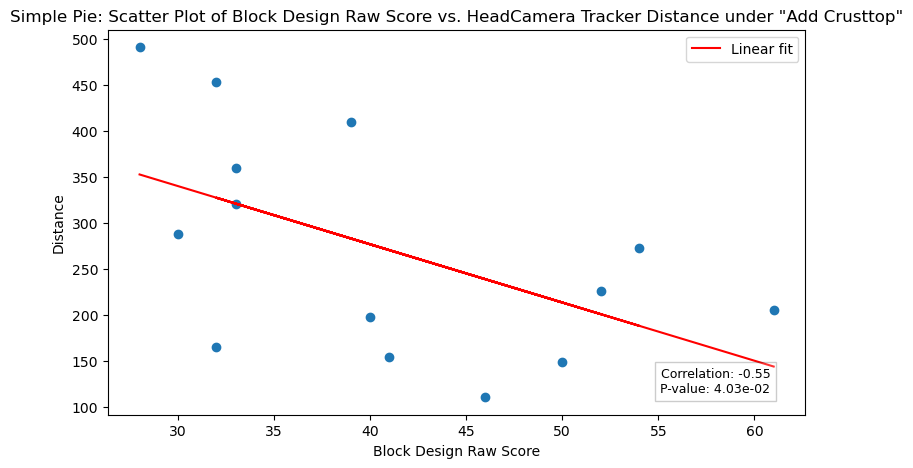

In [11]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['HeadCamera Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['HeadCamera Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['HeadCamera Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')

file_path = os.path.join(folder_path, '41 SP_CrusttopDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

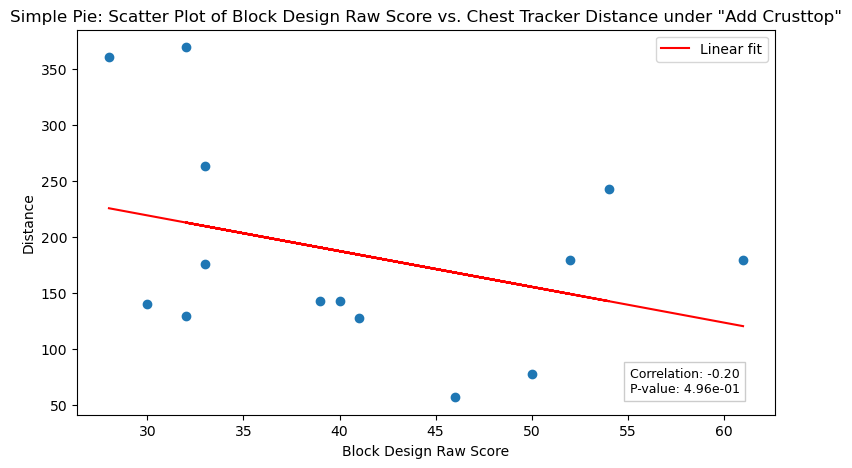

In [12]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['Chest Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['Chest Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['Chest Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '42 SP_CrusttopDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

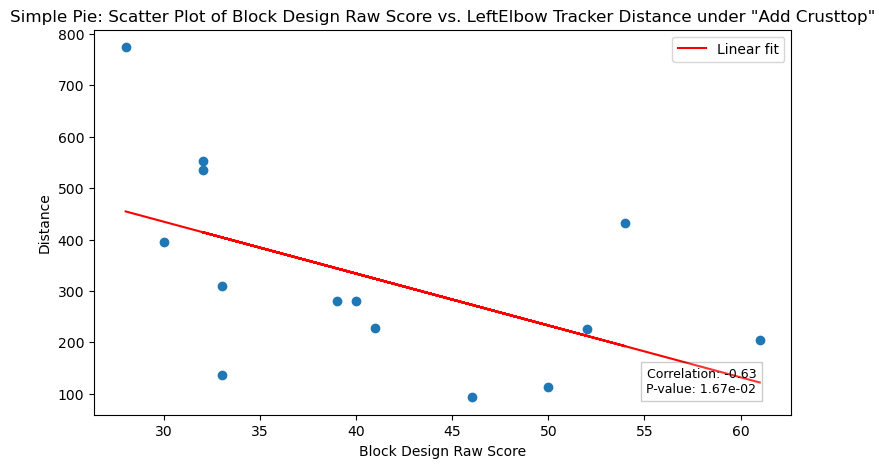

In [13]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftElbow Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftElbow Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftElbow Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '43 SP_CrusttopDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

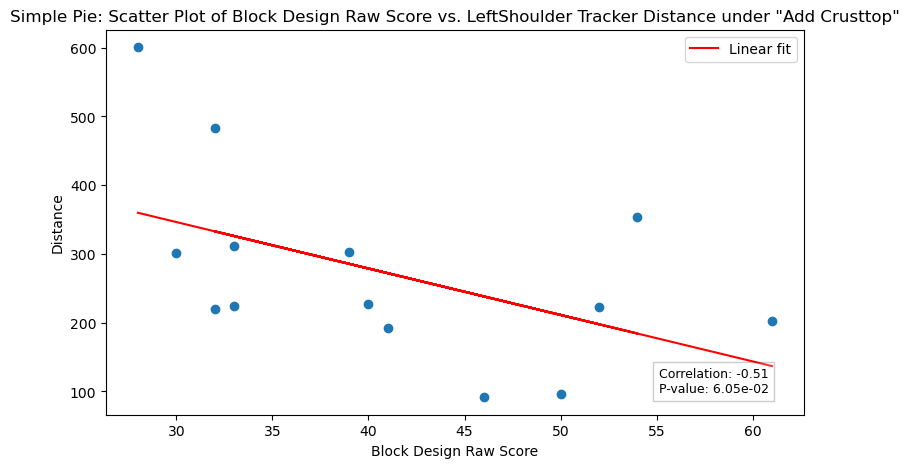

In [14]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftShoulder Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftShoulder Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftShoulder Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '44 SP_CrusttopDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

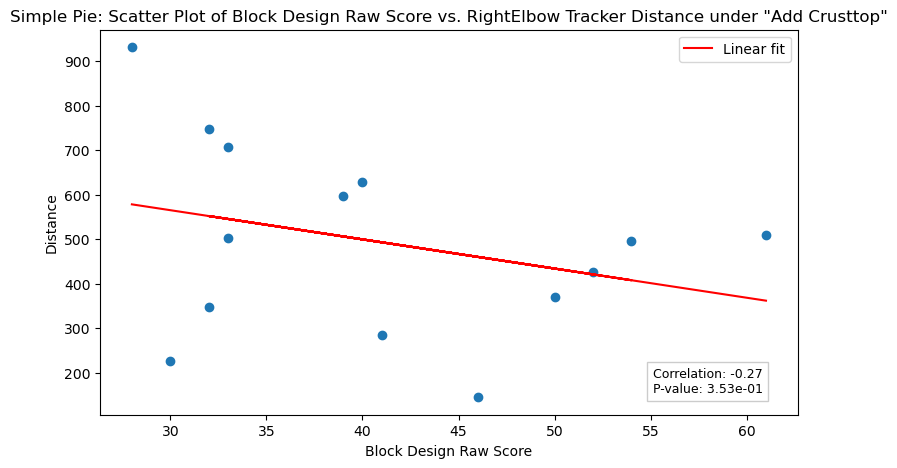

In [15]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightElbow Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightElbow Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightElbow Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '45 SP_CrusttopDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

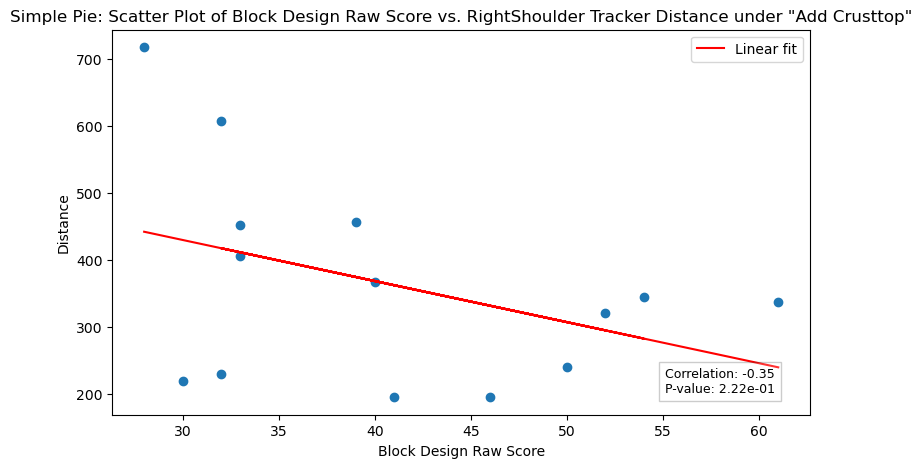

In [16]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightShoulder Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightShoulder Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightShoulder Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '46 SP_CrusttopDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

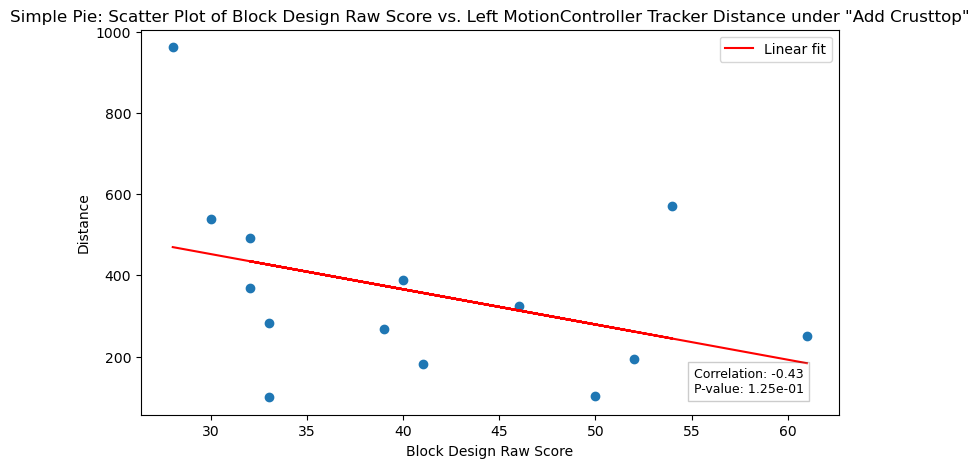

In [17]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerLeft Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerLeft Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerLeft Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '47 SP_CrusttopDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

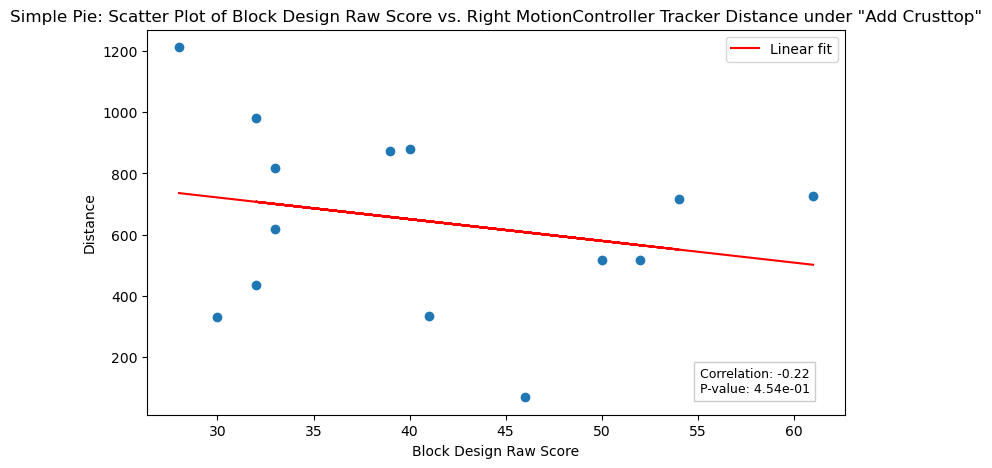

In [18]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerRight Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerRight Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerRight Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '48 SP_CrusttopDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()